# Regresion Lineal:Costo de un incidente de seguridad

En este ejercicio se explican los fundamentos basicos de la regresion lineal aplicada a un caso de uso sencillo relacionado con la ciberseguridad

### Enunciado del ejercicio.

El ejercicio consiste en predecir el costo de un incidente de seguridad en base al numero de equipos que se han visto afectados. El conjunto de datos es generado de manera aleatoria.

### 1.-Generar el DataSet

In [1]:
import numpy as np

x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.rand(100, 1)

print("La longitud del conjunto de datos es", len(x))

La longitud del conjunto de datos es 100


### 2. VIsulizacion del DataSet

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

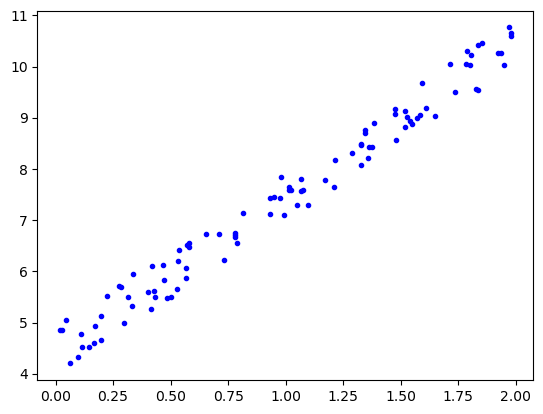

In [3]:
plt.plot(x, y, 'b.')
plt.show()

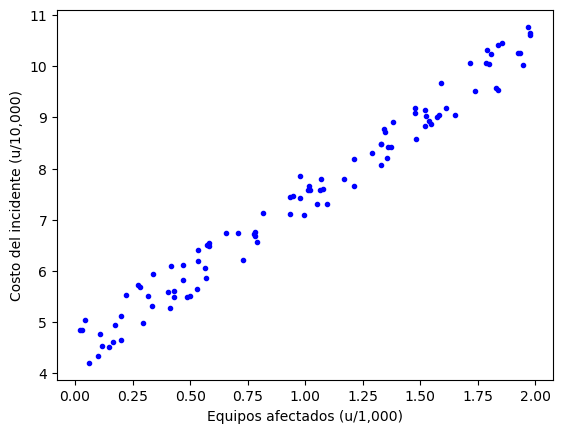

In [4]:
plt.plot(x, y, "b.")
plt.xlabel("Equipos afectados (u/1,000)")
plt.ylabel("Costo del incidente (u/10,000)")
plt.show()

# Modificacion del dataSet.

In [5]:
import pandas as pd

In [6]:
data = {'No_Equipos_Afectados': x.flatten(), "Costo": y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,No_Equipos_Afectados,Costo
0,0.532316,6.202649
1,0.098981,4.331063
2,1.947709,10.028975
3,0.172523,4.944742
4,1.784319,10.053023
5,0.197697,5.127863
6,1.933639,10.259417
7,0.780100,6.756812
8,0.469472,5.830068
9,1.345438,8.707497


In [7]:
# Escalado deel numero de equipos afecatdos 
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'] * 1000
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'].astype('int')
# Escalando el costo
df['Costo'] = df['Costo'] * 10000
df['Costo'] = df['Costo'].astype('int')
df.head(10)

,No_Equipos_Afectados,Costo
0,532,62026
1,98,43310
2,1947,100289
3,172,49447
4,1784,100530
5,197,51278
6,1933,102594
7,780,67568
8,469,58300
9,1345,87074


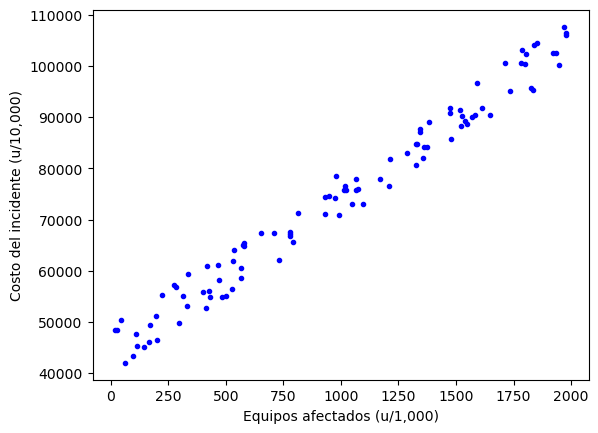

In [8]:
# Representacion grafica del DataFrame
plt.plot(df['No_Equipos_Afectados'], df["Costo"], "b.")
plt.xlabel("Equipos afectados (u/1,000)")
plt.ylabel("Costo del incidente (u/10,000)")
plt.show()

### Construccion del Modelo.

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
# Construccion del modelo y ajuste de la funcion
lin_reg=LinearRegression()
lin_reg.fit(df["No_Equipos_Afectados"].values.reshape(-1, 1), df["Costo"].values)


LinearRegression()

In [11]:
# Prametro Theta 0
lin_reg.intercept_

44172.96770179251

In [12]:
# Parametro Theta 1
lin_reg.coef_

array([30.45517564])

In [13]:
# Prediccion para el valor minimo y maximo del conjunto de datos de entrenamineto
x_min_max = np.array([[df["No_Equipos_Afectados"].max()]])
y_train_pred = lin_reg.predict(x_min_max)

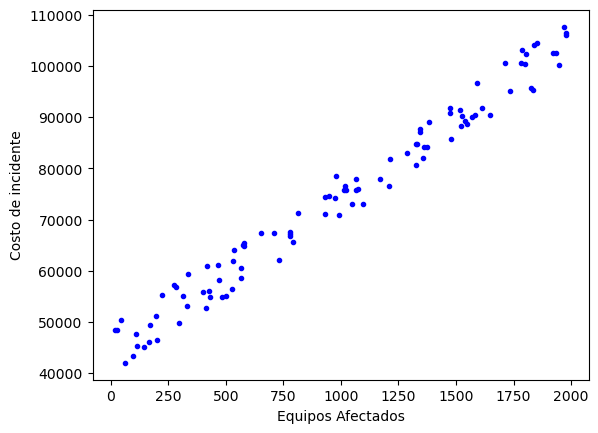

In [14]:
# Representacion grafica de la funcion de hipotesis generada
plt.plot(x_min_max, y_train_pred, "g-")
plt.plot(df["No_Equipos_Afectados"], df['Costo'], "b.")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo de incidente")
plt.show()

# 5.- Prediccion de nuevos ejemplos.


In [15]:
x_new = np.array([[1670]]) # No. de Equipos Afectados

#Prediccion del costo que tendria el incidente
Costo = lin_reg.predict(x_new)
print("El costo del incidente seria $: ", int(Costo[0]))

El costo del incidente seria $:  95033


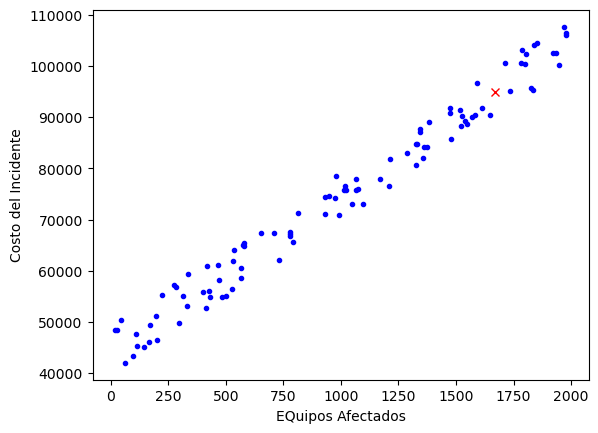

In [16]:
plt.plot(df["No_Equipos_Afectados"], df['Costo'], 'b.')
plt.plot(x_min_max, y_train_pred, 'g-')
plt.plot(x_new, Costo, "rx")
plt.xlabel("EQuipos Afectados")
plt.ylabel("Costo del Incidente")
plt.show()